# Solution to the BCM coding question
### Written by Claudia Clopath, translated to python by Tom George 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Set parameters 
N = 2                                    # number of inputs
T = 10**4                                # time of simulations
dt = 1                                   # simulation time step
alpha_w = 10**(-6)                        # learning rate for weights
ytarget = 10                             # output target 
x = np.array([[20,0],[0,20]])            # inputs have two patterns one (0-20) and two (20-0)
tau_theta = 50                           # time constant for theta

In [3]:
# Init
y = np.zeros(T)             # output
w = 0.5*np.ones((N,T))      # weights
theta = 5*np.ones(T)        # sliding threshold theta

In [4]:
# Simulate 
for t in range(T-1):
    p = np.random.choice([0,1])                                            # presentation of pattern 1 or 2 randomly
    y[t] = w[:,t]@x[:,p]                                                   # compute the output
    theta[t+1] = theta[t]+dt/tau_theta*(y[t]**2/ytarget - theta[t])        # update sliding theshold
    w[:,t+1] = w[:,t] + alpha_w*x[:,p]*y[t]*(y[t]-theta[t])                # update of the weights
    w[:,t+1] = (w[:,t+1]>0)*w[:,t+1]                                       # weigths can't be negative: hard bound at zero


Text(0.5, 0, 'time')

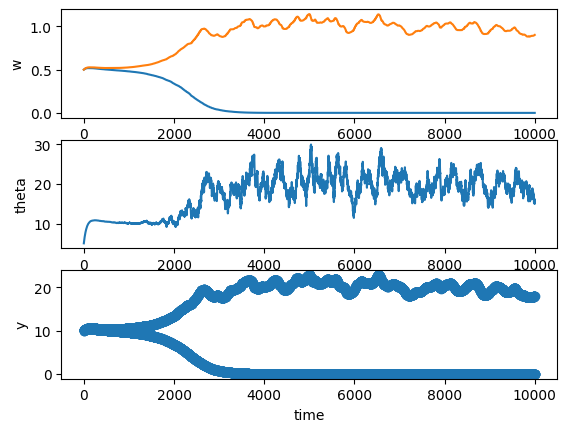

In [5]:
# Plot 
fig, ax = plt.subplots(3,1)
ax[0].plot(w[0,:],label = 'w[0]')
ax[0].plot(w[1,:],label = 'w[1]')
ax[0].set_ylabel('w');
ax[1].plot(theta); ax[1].set_ylabel('theta')
ax[2].scatter(np.arange(len(y)),y); ax[2].set_ylabel('y');ax[2].set_xlabel('time')